# Исследование надежности заемщиков

## Импорт библиотек и скачивание датасета

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


## Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В данных есть пропуски. Выведем информацию об их количестве.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

### Определение возможных причин появления пропусков  в данных

Заметим, что в обеих колонках (`days_employed` и `total_income`) одинаковое количество пропусков. Проверим, верно ли, что пропуски в этих колонках содержатся в одних и тех же строчках, то есть наличие пропуска в текущей строке в одной колонке гарантирует наличие пропуска в текущей строке в другой колонке

In [6]:
check_series = data['days_employed'].isna() == data['total_income'].isna()
check_series.unique()

array([ True])

In [7]:
data.groupby('income_type')['debt'].count()

income_type
безработный            2
в декрете              1
госслужащий         1459
компаньон           5085
пенсионер           3856
предприниматель        2
сотрудник          11119
студент                1
Name: debt, dtype: int64

При принятии решения о выдаче кредита банки обязательно оценивают платежеспособность потенциального заемщика. Для этого они смотрят на трудовой стаж и ежемесячный доход. Поэтому пропускать эти поля в анкете нельзя. Значит, пропуски там могли возникнуть либо случайно, либо по причине того, что человек не работает официально.

Из вывода последней ячейки видно, что больше всего заемщиков относятся к категориям "госслужащий", "компаньон", "пенсионер", "сотрудник". Следовательно, основная масса пропусков будет именно у этих людей. Так как значения пропущены в колонке, показывающей трудовой стаж, на который банки смотрят обязательно (за исключением случаев, когда человек не работает официально), то единственно возможной категорией для неслучайных пропусков остаются пенсионеры. Но пенсионеры проработали много лет, значит, у них колоссальный трудовой стаж, а значит, пропуски в этой категории носят также случайный характер.

### Удаление пропусков

Пропуски встречаются в столбцах `days_employed` и `total_income`, тип значений в которых является числовым. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

In [8]:
median_income_type = data.groupby('income_type')['total_income'].median()
for inc in data['income_type'].unique():
    data.loc[(data['income_type'] == inc) & (data['total_income'].isna()), 'total_income'] = median_income_type.loc[inc]

### Обработка аномальных значений

В данных присутствуют аномальные значения, например, отрицательное значение трудового стажа. Обработаем их.

In [9]:
data['days_employed'] = data['days_employed'].apply(lambda x: abs(x))

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [10]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

Посмотрим теперь на столбец, содержащий информацию о количестве детей.

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Посмотрим, как часто они встречаются

In [12]:
data.loc[(data['children'] == -1) | (data['children'] == 20), :].shape[0]

123

Таких значений всего 123. В сравнении с 21000 это небольшое количество. Удалим соответствующие строки. (Хотя, вообще говоря, 123 строки - это довольно много информации, поэтому можно было бы рассмотреть еще 2 пути решения: замена -1 на 1, а 20 на 2 или замена их самыми часто встречающимися значениями)

In [13]:
data = data.loc[(data['children'] != -1) & (data['children'] != 20), :].reset_index(drop=True)

In [14]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Продолжим обрабатывать пропуски

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.

In [15]:
for inc in data['income_type'].unique():
    data.loc[(data['income_type'] == inc) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[data['income_type'] == inc, 'days_employed'].median()

In [16]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [17]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

Обработаем сначала неявные дубликаты. В столбце `education` есть одни и те же значения, записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру

In [18]:
data['education'] = data['education'].str.lower()

Теперь удалим явные дубликаты

In [19]:
data.duplicated().sum()

71

In [20]:
data = data.drop_duplicates(keep='first')

### Категоризация данных

Создадим столбец `total_income_category`, в котором разобьем всех заемщиков на категории по уровню дохода следующим образом:

* 0–30000 — `'E'`;
* 30001–50000 — `'D'`;
* 50001–200000 — `'C'`;
* 200001–1000000 — `'B'`;
* 1000001 и выше — `'A'`.

In [21]:
def categorize_income(income):
    if 0 <= income <= 30000:
        return 'E'
    if 30001 <= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
    if income > 1000000:
        return 'A'

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем перечень уникальных целей взятия кредита из столбца `purpose`.

In [23]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

На основании данных из столбца `purpose` сформируем новый столбец `purpose_category`, в который войдут следующие категории:

* `'операции с автомобилем'`,
* `'операции с недвижимостью'`,
* `'проведение свадьбы'`,
* `'получение образования'`.

In [24]:
def categorize_purpose(purpose):
    if 'жиль' in purpose or 'недвижимост' in purpose:
        return 'операции с недвижимостью'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'образован' in purpose:
        return 'получение образования'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

На этом этапе предобработка данных завершена. Выведем итоговый датафрейм

In [26]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Исследование данных

### Зависимость между количеством детей и возвратом кредита в срок

Для начала разобьем заемщиков на категории по количеству детей. Номер категории - количество детей.

*Примечание*: Столбец mean показывает долю заемщиков, имевших задолженность, от общего числа потенциальных заемщиков по каждой категории

In [27]:
children_pivot = data.pivot_table(index='children', values='debt', aggfunc=['count', 'sum', 'mean'])
children_pivot.columns = children_pivot.columns.droplevel(1)
children_pivot['mean'] *= 100
children_pivot

,count,sum,mean
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


Видно, что больше всего заемщиков, у которых детей нет совсем, и с ростом количества детей число заемщиков уменьшается. Количество наблюдений по категориям сильно отличается, поэтому имеет смысл смотреть на долю заемщиков (в процентах), имевших задолженность, по каждой категории отдельно.

Чтобы лучше понять, есть ли зависимость, построим график. По оси Ox отложено количество детей, а по оси Oy - доля людей с таким количеством детей, имевших задолженность по кредиту.

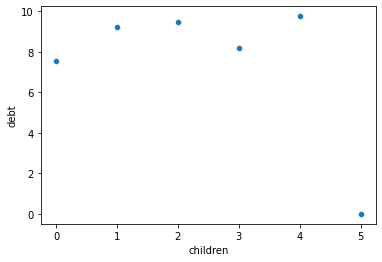

In [28]:
graph = sns.scatterplot(x=children_pivot.index, y=children_pivot['mean'])
graph.set(xlabel='children', ylabel='debt')

plt.show()

График и сводная таблица наглядно показывают, что у тех людей, у которых детей нет, и у тех, у кого 3 ребенка, задолженностей меньше, чем у тех, у кого 1, 2, 4 ребенка. А те, у кого 5 детей, задолженностей не имеют вообще. Последнее может быть связано с тем, что эти лица имеют хороший ежемесячный доход. Проверим это.

C:\Users\gturk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


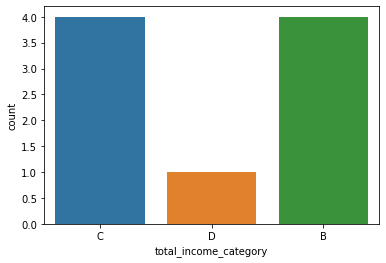

In [29]:
five_children = data[data['children'] == 5]

sns.countplot(five_children['total_income_category'])

plt.show()

Из гистограммы видно, что примерно половина людей, у которых 5 детей, имеют ежемесячный доход в диапазоне от 200000 до 1000000 рублей. Еще 4 человека из 9 имеют доход от 50000 до 20000 рублей в месяц. И только 1 человек имеет доход от 30000 до 50000 рублей в месяц.

Чтобы более точно проверить гипотезу, рассмотрим отдельно тех, кто относится к категории C, то есть имеет доход от 50000 до 200000 рублей в месяц. Для этого посмотрим на их зарплаты.

In [30]:
data.loc[(data['children'] == 5) & (data['total_income_category'] == 'C'), 'total_income']

3959     142594
4376     168460
15733     77552
16120    126102
Name: total_income, dtype: int32

Видно, что их доходы в основном больше 120000 рублей, что составляет вполне достаточную сумму, чтобы гасить кредиты вовремя. Гипотеза подтвердилась.

**Вывод:**

Больше всего заемщиков - это лица, у которых детей нет. С ростом количества детей количество заемщиков падает. Аналогичным образом ведет себя абсолютное количество заемщиков, не погасивших кредит в срок. Однако при рассмотрении каждой категории заемщиков в отдельности выяснилось, что у тех людей, у которых детей нет совсем, и у тех, у кого 3 ребенка, задолженностей в среднем меньше, чем у тех, кто имеет 1, 2 или 4 детей.

Те, у кого 5 детей, не имеют задолженностей вообще. Это может быть связано с тем, что они имеют хороший доход и потому могут погасить кредит в срок.

### Зависимость между семейным положением и возвратом кредита в срок

Посмотрим, каким семейным положением обладают заемщики.

In [31]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [32]:
for i in range(5):
    print(f'Категория {i}:', data.loc[data['family_status_id'] == i, 'family_status'].unique()[0])

Категория 0: женат / замужем
Категория 1: гражданский брак
Категория 2: вдовец / вдова
Категория 3: в разводе
Категория 4: Не женат / не замужем


Теперь создадим сводную таблицу по категориям семейного положения и отобразим зависимость на графике

In [33]:
family_status_pivot = data.pivot_table(index='family_status_id', values='debt', aggfunc=['count', 'sum', 'mean'])
family_status_pivot.columns = family_status_pivot.columns.droplevel(1)
family_status_pivot['mean'] *= 100
family_status_pivot

,count,sum,mean
family_status_id,,,
0,12261,927,7.560558
1,4134,385,9.313014
2,951,63,6.624606
3,1189,84,7.064760
4,2796,273,9.763948


Из сводной таблицы видно, что больше всего заемщиков - это люди, состоящие в законном браке, а меньше всего среди заемщиков вдов и людей в разводе. Промежуточное положени занимают те, кто не женат (не замужем) и те, кто состоит в гражданском браке.

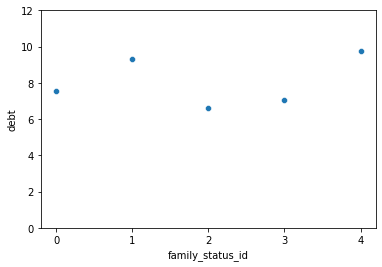

In [34]:
graph = sns.scatterplot(x=family_status_pivot.index, y=family_status_pivot['mean'])
graph.set(xlabel='family_status_id', ylabel='debt', yticks=range(0, 13, 2), xticks=family_status_pivot.index)

plt.show()

График позволяет сказать, что люди, находящиеся в так называемом "гражданском браке", и люди, которые не женаты (не замужем), чаще имеют задолженности, чем те, кто относится к категориям 0, 2, 3 (женат/замужем, вдовец/вдова, в разводе)

**Вывод:**

Влияние семейного положения на факт погашения кредита в срок определенно есть. Из таблицы и графика видно, больше всего задолженностей у лиц, которые не женаты (не замужем), и у тех, кто состоит в гражданском браке. Меньше всего задолженностей у вдов (вдовцов). Среднее положение занимают те, кто женат (замужем) или в разводе.

### Зависимость между уровнем дохода и возвратом кредита в срок

Все заемщики были разделены на категории по уровню дохода, как описано выше. Для удобства продублируем эти категории:

* 0–30000 — `'E'`;
* 30001–50000 — `'D'`;
* 50001–200000 — `'C'`;
* 200001–1000000 — `'B'`;
* 1000001 и выше — `'A'`.

Построим сводную таблицу и график

In [35]:
total_income_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'sum', 'mean'])
total_income_pivot.columns = total_income_pivot.columns.droplevel(1)
total_income_pivot['mean'] *= 100
total_income_pivot

,count,sum,mean
total_income_category,,,
A,25,2,8.000000
B,5014,354,7.060231
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909


Неудивительно, что людей, имеющих слишком маленький (до 30000) доход и людей, имеющих внушительный (1000000+) доход, среди заемщиков немного: первые, скорее всего, не смогут платить, а вторым редко нужно брать кредиты (да и вообще таких людей немного), а если и нужно, то для каких-то масштабных целей.

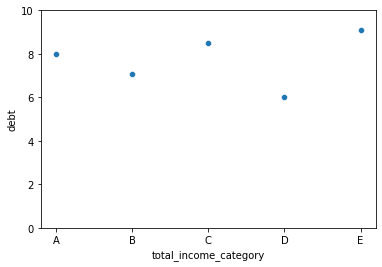

In [36]:
graph = sns.scatterplot(x=total_income_pivot.index, y=total_income_pivot['mean'])
graph.set(xlabel='total_income_category', ylabel='debt', yticks=range(0, 11, 2), xticks=total_income_pivot.index)

plt.show()

Интересно, однако, то, что меньше всего задолженностей у тех, чей ежемесячный доход лежит в диапазоне от 30000 до 50000. Второе место занимают те, чей доход варьируется в диапазоне от 200000 до 1000000. Среднее положение - люди с доходом больше 1000000 и люди с доходом от 50000 до 200000. А больше всего задолженностей у тех, чей ежемесячный доход меньше 30000, что вполне объяснимо: этим людям сложнее всего возвращать кредиты по причине невысокого дохода.

Давайте посмотрим, на какие цели берут кредиты самые богатые и самые бедные люди. Для этого построим сводные таблицы

Для самых богатых:

In [37]:
rich_pivot = data[data['total_income_category'] == 'A'].pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'sum', 'mean'])
rich_pivot.columns = rich_pivot.columns.droplevel(1)
rich_pivot['mean'] *= 100
rich_pivot

,count,sum,mean
purpose_category,,,
операции с автомобилем,2,0,0.000000
операции с недвижимостью,17,1,5.882353
получение образования,4,1,25.000000
проведение свадьбы,2,0,0.000000


Для самых бедных:

In [38]:
poor_pivot = data[data['total_income_category'] == 'E'].pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'sum', 'mean'])
poor_pivot.columns = poor_pivot.columns.droplevel(1)
poor_pivot['mean'] *= 100
poor_pivot

,count,sum,mean
purpose_category,,,
операции с автомобилем,2,0,0.000000
операции с недвижимостью,11,2,18.181818
получение образования,5,0,0.000000
проведение свадьбы,4,0,0.000000


Из этих таблиц хорошо видно, что и те, и другие чаще всего берут кредиты для проведения различных операций с недвижимостью, второе место занимают кредиты на образование. У бедных на третьем месте проведение свадьбы, а на четвертом - операции с автомобилем. У богатых эти категории занимают одинаковое положение в "рейтинге".

Также следует заметить, что у бедных задолженности есть только по кредитам на операции с недвижимостью, а у богатых - на операции с недвижимостью и на образование.

**Вывод:**

Таким образом, выяснилось, что меньше всего задолженностей по кредитам имеют те, чей ежемесячный доход составляет 30000-50000 или 200000-1000000. А больше всего задолженностей у тех, чей доход меньше 30000, что полне объяснимо: у них низкий ежемесячный доход. Также было замечено, что среди заемщиков больше всего лиц с доходом 50000-1000000, а меньше всего - миллионеров и лиц с доходом ниже 30000. Интересно, что и миллионеры, и лица с самым низким ежемесячным доходом чаще всего берут кредиты для проведения операций с недвижимостью, на втором месте - кредиты на получение образования, причем задолженности по кредитам на операции с недвижимостью есть и у богатых, и у бедных, а задолженности на получение образования - только у богатых.

### Влияние разных целей кредита на его возврат в срок

Построим сводную таблицу по целям кредитов и несколько диаграмм для удобства визуального анализа

In [39]:
purpose_pivot = data.pivot_table(index='purpose_category', values='debt',  aggfunc=['count', 'sum', 'mean'])
purpose_pivot.columns = purpose_pivot.columns.droplevel(1)
purpose_pivot['mean'] *= 100
purpose_pivot

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10751,780,7.255139
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


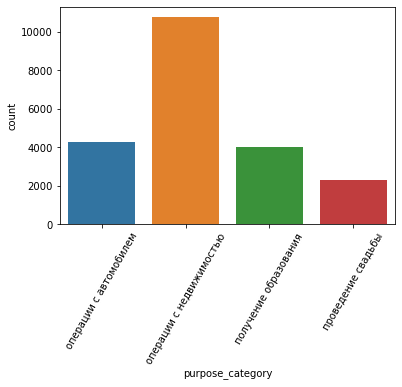

In [40]:
graph_count = sns.barplot(x=purpose_pivot.index, y=purpose_pivot['count'])
graph_count.set_xticklabels(graph_count.get_xticklabels(), rotation = 60)

plt.show()

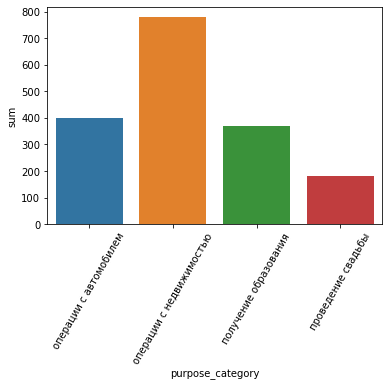

In [41]:
graph_sum = sns.barplot(x=purpose_pivot.index, y=purpose_pivot['sum'])
graph_sum.set_xticklabels(graph_sum.get_xticklabels(), rotation = 60)

plt.show()

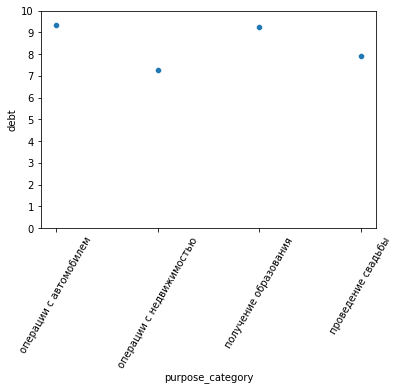

In [42]:
graph_mean = sns.scatterplot(x=purpose_pivot.index, y=purpose_pivot['mean'])
graph_mean.set(xlabel='purpose_category', ylabel='debt', yticks=range(0, 11), xticks=purpose_pivot.index)
graph_mean.set_xticklabels(purpose_pivot.index, rotation = 60)

plt.show()

**Вывод:**

Из первых двух гистограмм видно, что больше всего берут кредиты на операции с недвижимостью. По ним же больше всего долгов. Распределение абсолютного количества должников по категориям такое же, как общее распределение заемщиков.

Однако в процентном отношении должников по кредитам на операции с недвижимостью меньше всего. Больше всего должников по кредитам на операции с автомобилями и на получение образования. Доля задолженностей по кредитам на проведение свадьбы занимает промежуточное положение.

## Общий вывод

**_В ходе исследования были получены следующие результаты:_**

1) Связь между количеством детей и фактом погашения кредита в срок
  * Заемщики, у которых по 5 детей не имеют долгов вообще. Это может быть связано с их хорошим доходом.
  * У заемщиков, у которых либо 3 ребенка, либо нет детей вообще в среднем имеют меньше задолженностей, чем те, у кого 1, 2 или 4 ребенка

2) Связь между семейным положением и фактом погашения кредита в срок
  * Больше всего задолженностей у лиц, которые не женаты (не замужем), и у тех, кто состоит в гражданском браке. Меньше всего задолженностей у вдов (вдовцов). Среднее положение занимают те, кто женат (замужем) или в разводе.

3) Связь между ежемесячным доходом и фактом погашения кредита в срок
  * Среди заемщиков больше всего лиц с доходом 50000-1000000, а меньше всего - миллионеров и лиц с доходом ниже 30000
  * Меньше всего задолженностей по кредитам имеют те, чей ежемесячный доход составляет 30000-50000 или 200000-1000000
  * Больше всего задолженностей у тех, чей доход меньше 30000, что полне объяснимо: у них низкий ежемесячный доход. Это же объясняет малое абсолютное количество таких заемщиков
  * И миллионеры, и лица с самым низким ежемесячным доходом чаще всего берут кредиты для проведения операций с недвижимостью, на втором месте - кредиты на получение образования, причем задолженности по кредитам на операции с недвижимостью есть и у богатых, и у бедных, а задолженности на получение образования - только у богатых

4) Связь между целью кредита и фактом его погашения в срок
  * Больше всего берут кредиты на операции с недвижимостью. По ним же больше всего долгов. Имеется в виду абсолютное количество
  * В процентном отношении должников по кредитам на операции с недвижимостью меньше всего. Больше всего должников по кредитам на операции с автомобилями и на получение образования. Доля задолженностей по кредитам на проведение свадьбы занимает промежуточное положение

На основании этих результатов можно сформировать образ "идеального" заемщика. Это человек, у которого пятеро детей, который либо женат (замужем), либо вдовец (вдова). Его ежемесячный доход составляет 200000-1000000 рублей. Цель его кредита - проведение операций с недвижимостью.

Теперь что касается образа "плохого" заемщика. У него 1, 2 или 4 ребенка. Он либот холост, либо состоит в так называемом "гражданском браке" и имеет доход до 30000 в месяц. Цель его кредита - получение образования или проведение операций с автомобилем.